In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Tuberculosis Visualizations

In [12]:
TB_deaths = pd.read_csv("Desktop/finals/analyzedTB/deathsTB.csv")
TB_race_age_cases =pd.read_csv("Desktop/finals/analyzedTB/raceAgeCases.csv")
TB_state_cases = pd.read_csv("Desktop/finals/analyzedTB/stateCases.csv")

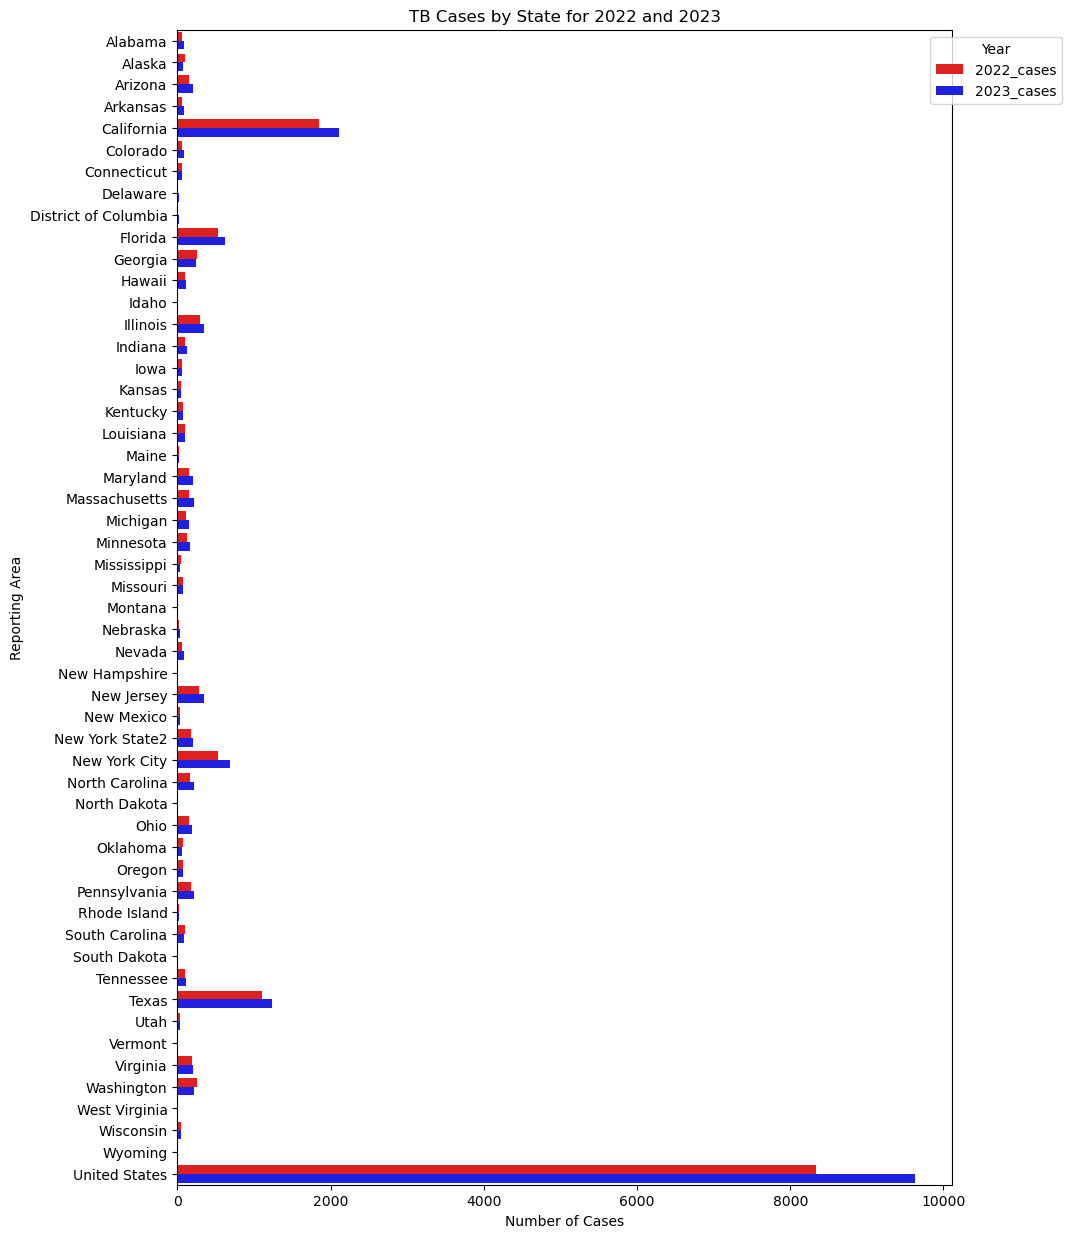

In [130]:
state_cases_melted = state_cases.melt(id_vars='Reporting_area', value_vars=['2022_cases', '2023_cases'],
                                      var_name='Year', value_name='Cases')

plt.figure(figsize=(10, 15))  
sns.barplot(data=state_cases_melted, y='Reporting_area', x='Cases', hue='Year', palette=['red', 'blue'])
plt.title('TB Cases by State for 2022 and 2023')
plt.ylabel('Reporting Area') 
plt.xlabel('Number of Cases') 
plt.legend(title='Year', loc='upper right', bbox_to_anchor=(1.15, 1))  
plt.show()

<Figure size 2000x1000 with 0 Axes>

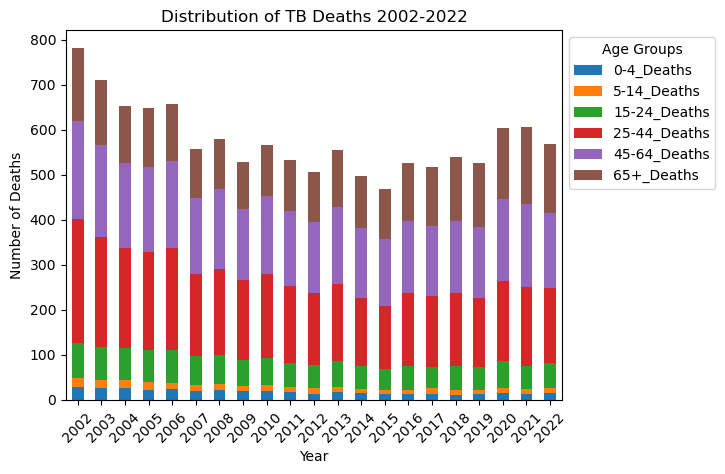

In [124]:
TB_deaths_sorted = TB_deaths.sort_values('Year', ascending=True)
plt.figure(figsize=(20,10))
ages_columns = ['0-4_Deaths', '5-14_Deaths', '15-24_Deaths', '25-44_Deaths', '45-64_Deaths', '65+_Deaths']
TB_deaths_sorted.set_index('Year')[ages_columns].plot(kind='bar', stacked=True)
plt.title('Distribution of TB Deaths 2002-2022')
plt.ylabel('Number of Deaths')
plt.xlabel('Year')
plt.xticks(rotation=45)  
plt.legend(title='Age Groups', loc='upper left', bbox_to_anchor=(1, 1)) 
plt.show()

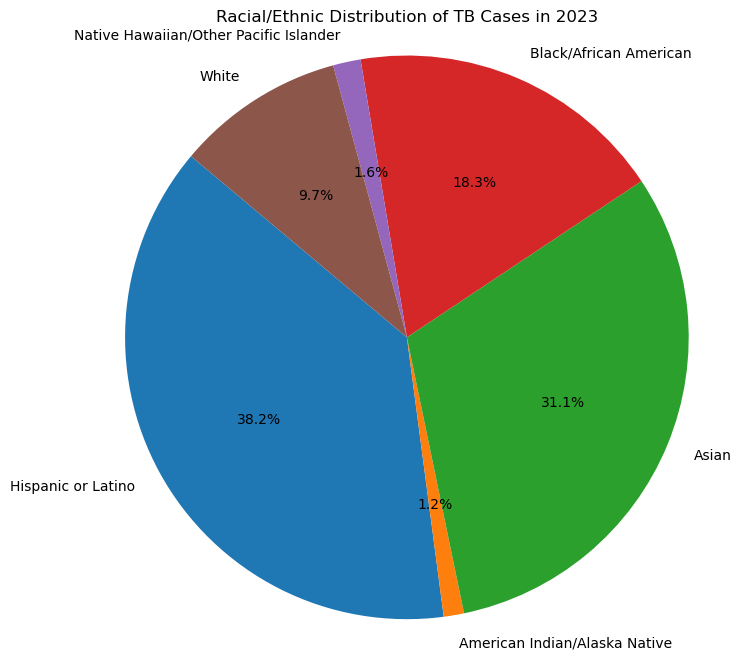

In [120]:
latest_year = race_age_cases['Year'].max()
race_data = race_age_cases[race_age_cases['Year'] == latest_year][['Hispanic_Latino', 'American_Indian_Alaska_Native', 'Asian', 'Black_AA', 'Native_Hawaiian_PI_Cases', 'White_Cases']].iloc[0]
plt.figure(figsize=(8, 8))
labels = ['Hispanic or Latino', 'American Indian/Alaska Native', 'Asian', 'Black/African American', 'Native Hawaiian/Other Pacific Islander', 'White']
plt.pie(race_data, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title(f'Racial/Ethnic Distribution of TB Cases in {latest_year}')
plt.axis('equal')  
## CREATE A LEGEND!! 
plt.show()

# Lyme Disease Visualizations

In [171]:
race = pd.read_csv("Desktop/finals/analyzedLyme/race_merged.csv") 
region = pd.read_csv("Desktop/finals/analyzedLyme/region_merged.csv")
state_year = pd.read_csv("Desktop/finals/analyzedLyme/state_yar_merged.csv") 
ym = pd.read_csv("Desktop/finals/analyzedLyme/years_months_merged.csv") 
county = pd.read_csv("Desktop/finals/analyzedLyme/County-State-Incidence!.csv")  
age_gender = pd.read_csv("Desktop/finals/analyzedLyme/Rate-AgeGroup-Gender-Clean.csv")

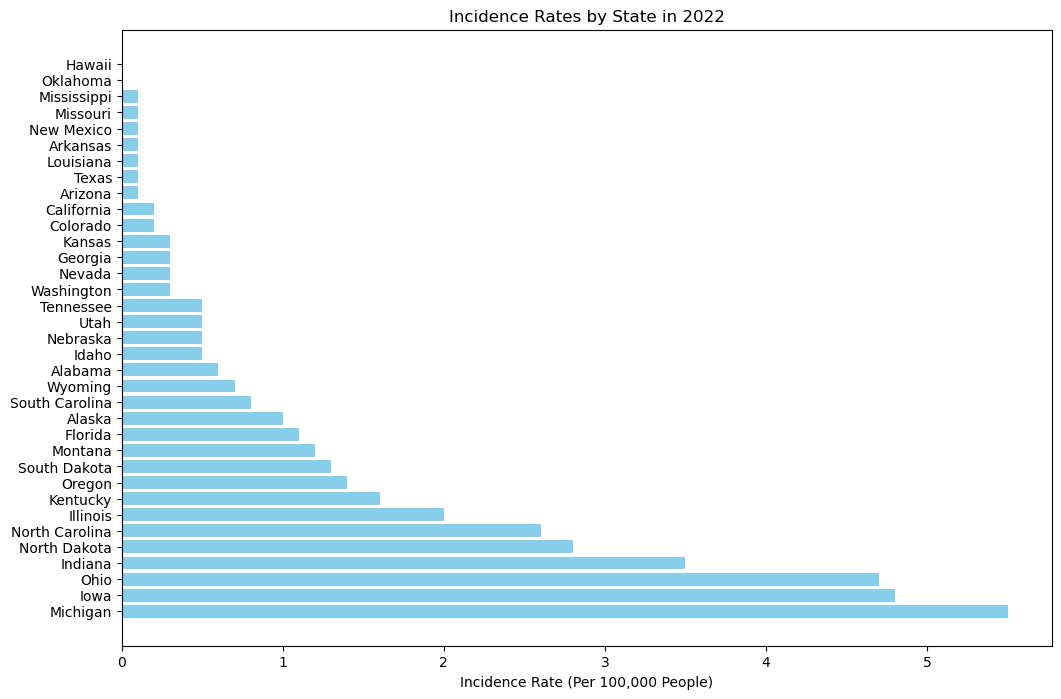

In [173]:
data_2022 = state_year[['State', '2022_incidence']]
data_2022_sorted = data_2022.sort_values('2022_incidence', ascending=False)
plt.figure(figsize=(12, 8))
plt.barh(data_2022_sorted['State'], data_2022_sorted['2022_incidence'], color='skyblue')
plt.xlabel('Incidence Rate (Per 100,000 People)')
plt.title('Incidence Rates by State in 2022')
plt.show()

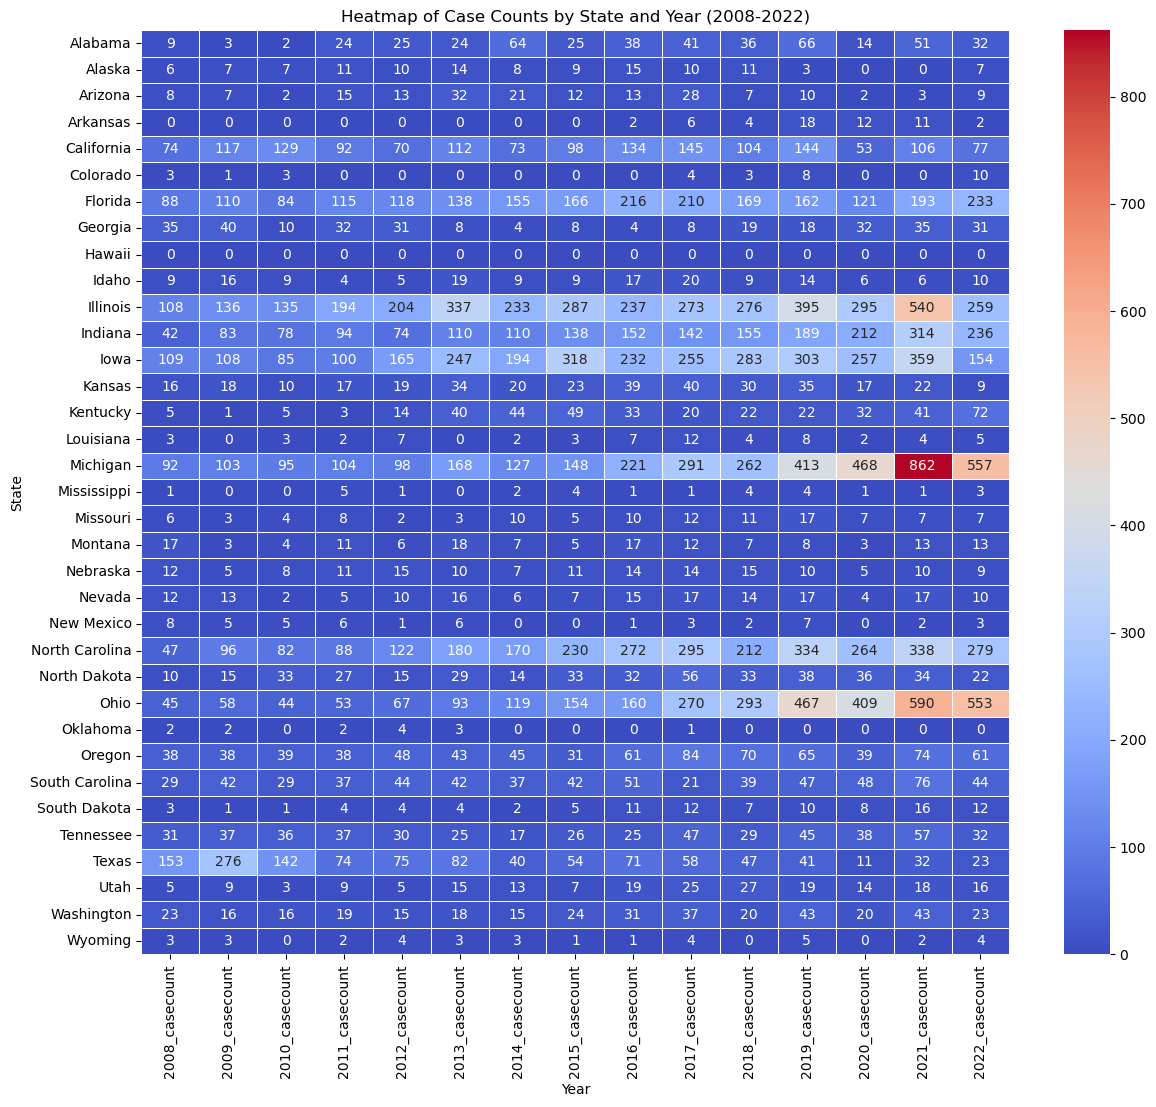

In [185]:
case_count_columns = state_year.columns[state_year.columns.str.contains('casecount')]
data_casecount = state_year.set_index('State')[case_count_columns]
plt.figure(figsize=(14, 12))
sns.heatmap(data_casecount, cmap='coolwarm', annot=True, fmt="d", linewidths=.5)
plt.title('Heatmap of Case Counts by State and Year (2008-2022)')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()

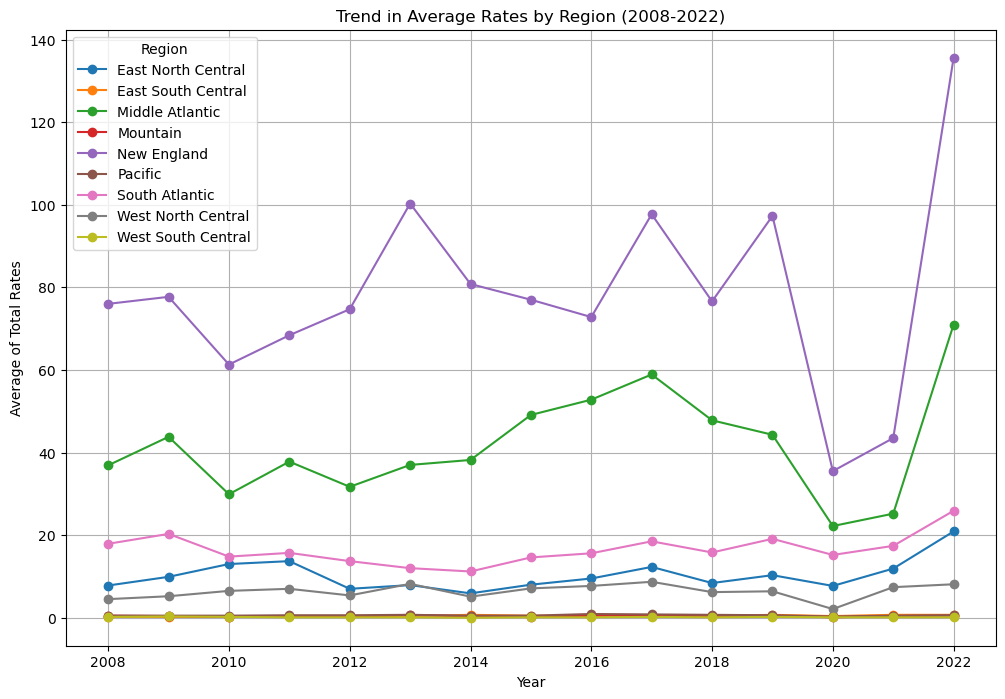

In [181]:
unique_regions = region['Region'].unique()
plt.figure(figsize=(12, 8))
for region_name in unique_regions:
    region_data = region[region['Region'] == region_name]
    plt.plot(region_data['Year'], region_data['Average of totalrates'], marker='o', label=region_name)
plt.title('Trend in Average Rates by Region (2008-2022)')
plt.xlabel('Year')
plt.ylabel('Average of Total Rates')
plt.legend(title='Region')
plt.grid(True)
plt.show()

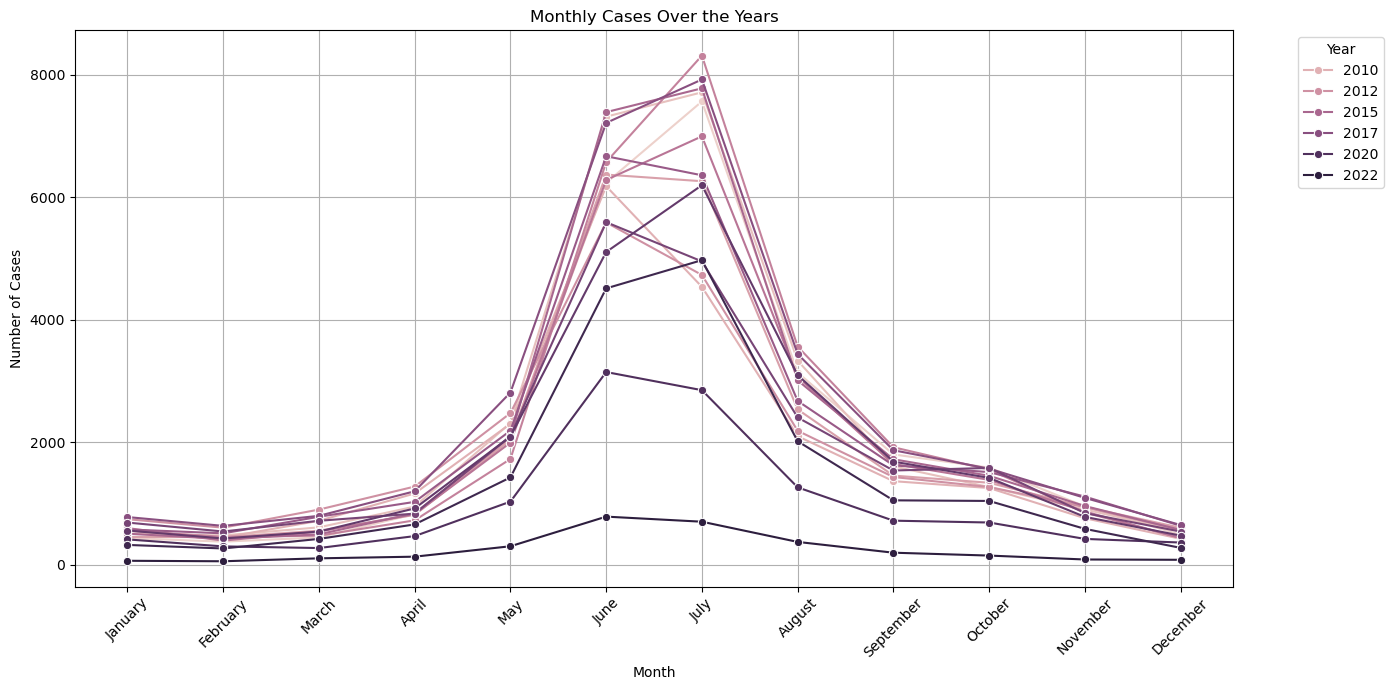

In [189]:
months_order = ["January", "February", "March", "April", "May", "June", "July", 
                "August", "September", "October", "November", "December"]
ym['Onset Month'] = pd.Categorical(ym['Onset Month'], categories=months_order, ordered=True)
plt.figure(figsize=(14, 7))
sns.lineplot(data=ym, x='Onset Month', y='Monthly Cases', hue='Year', marker='o')
plt.title('Monthly Cases Over the Years')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [222]:
import contextily as ctx
import geopandas as gpd
import os 

In [316]:
gdf = gpd.read_file('Desktop/UScounties') 
county['ctyname'] =  county['Ctyname'].str.replace(' County', '') 
gdf['NAME'] = gdf['NAME'].str.strip()  
merged_gdf = gdf.set_index('NAME').join(county.set_index('Ctyname'))

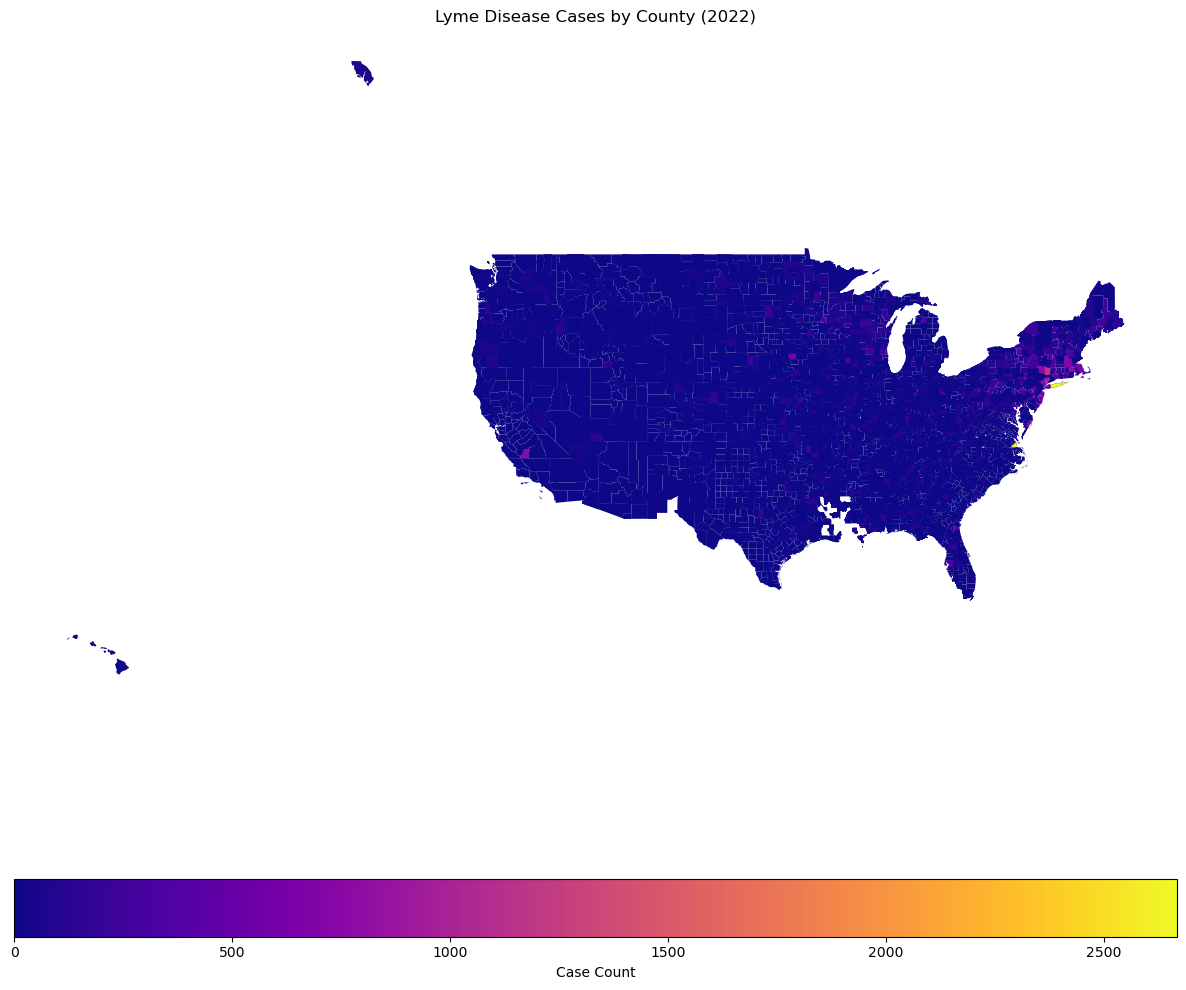

In [326]:
merged_gdf = merged_gdf.to_crs(epsg=3857)
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
merged_gdf.plot(column='cases2022', ax=ax, cmap = 'plasma', legend=True, legend_kwds={'label': "Case Count", 'orientation': "horizontal"})
ax.set_axis_off()
plt.title('Lyme Disease Cases by County (2022)')
plt.show()

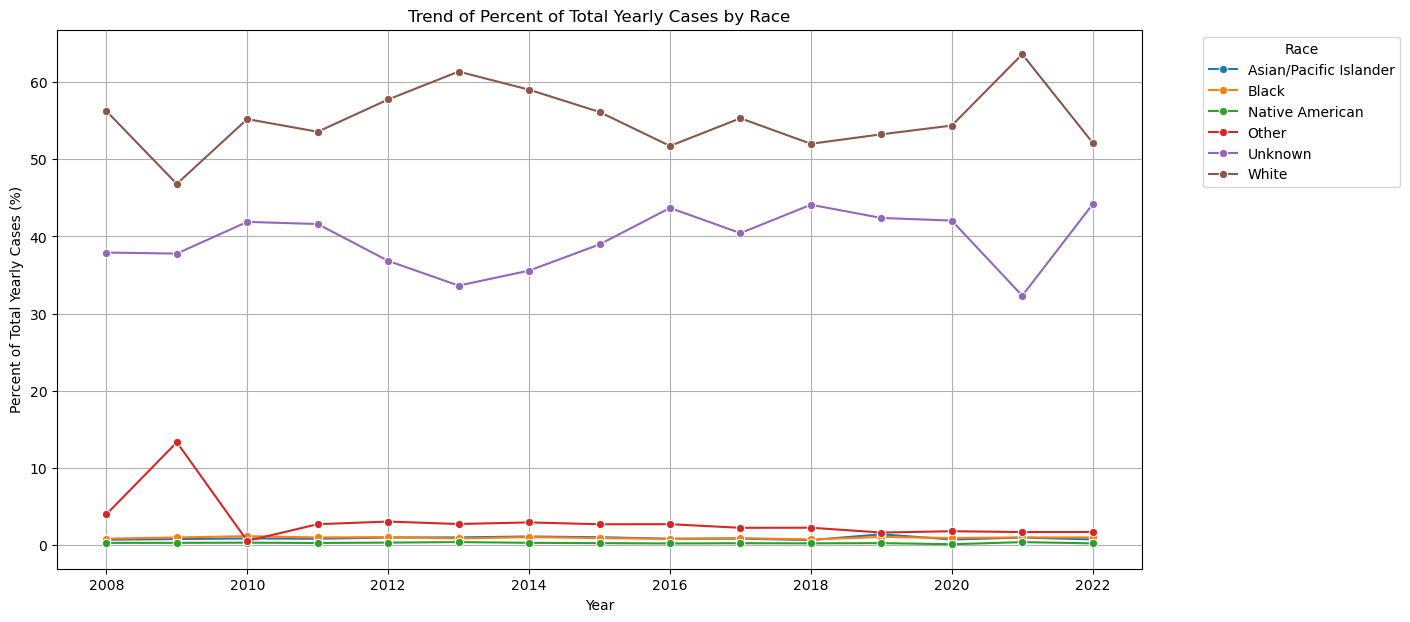

In [320]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=race, x='Year', y='Percent of Total Yearly Cases', hue='Race', marker='o')
plt.title('Trend of Percent of Total Yearly Cases by Race')
plt.ylabel('Percent of Total Yearly Cases (%)')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc=2)
plt.grid(True)
plt.show()

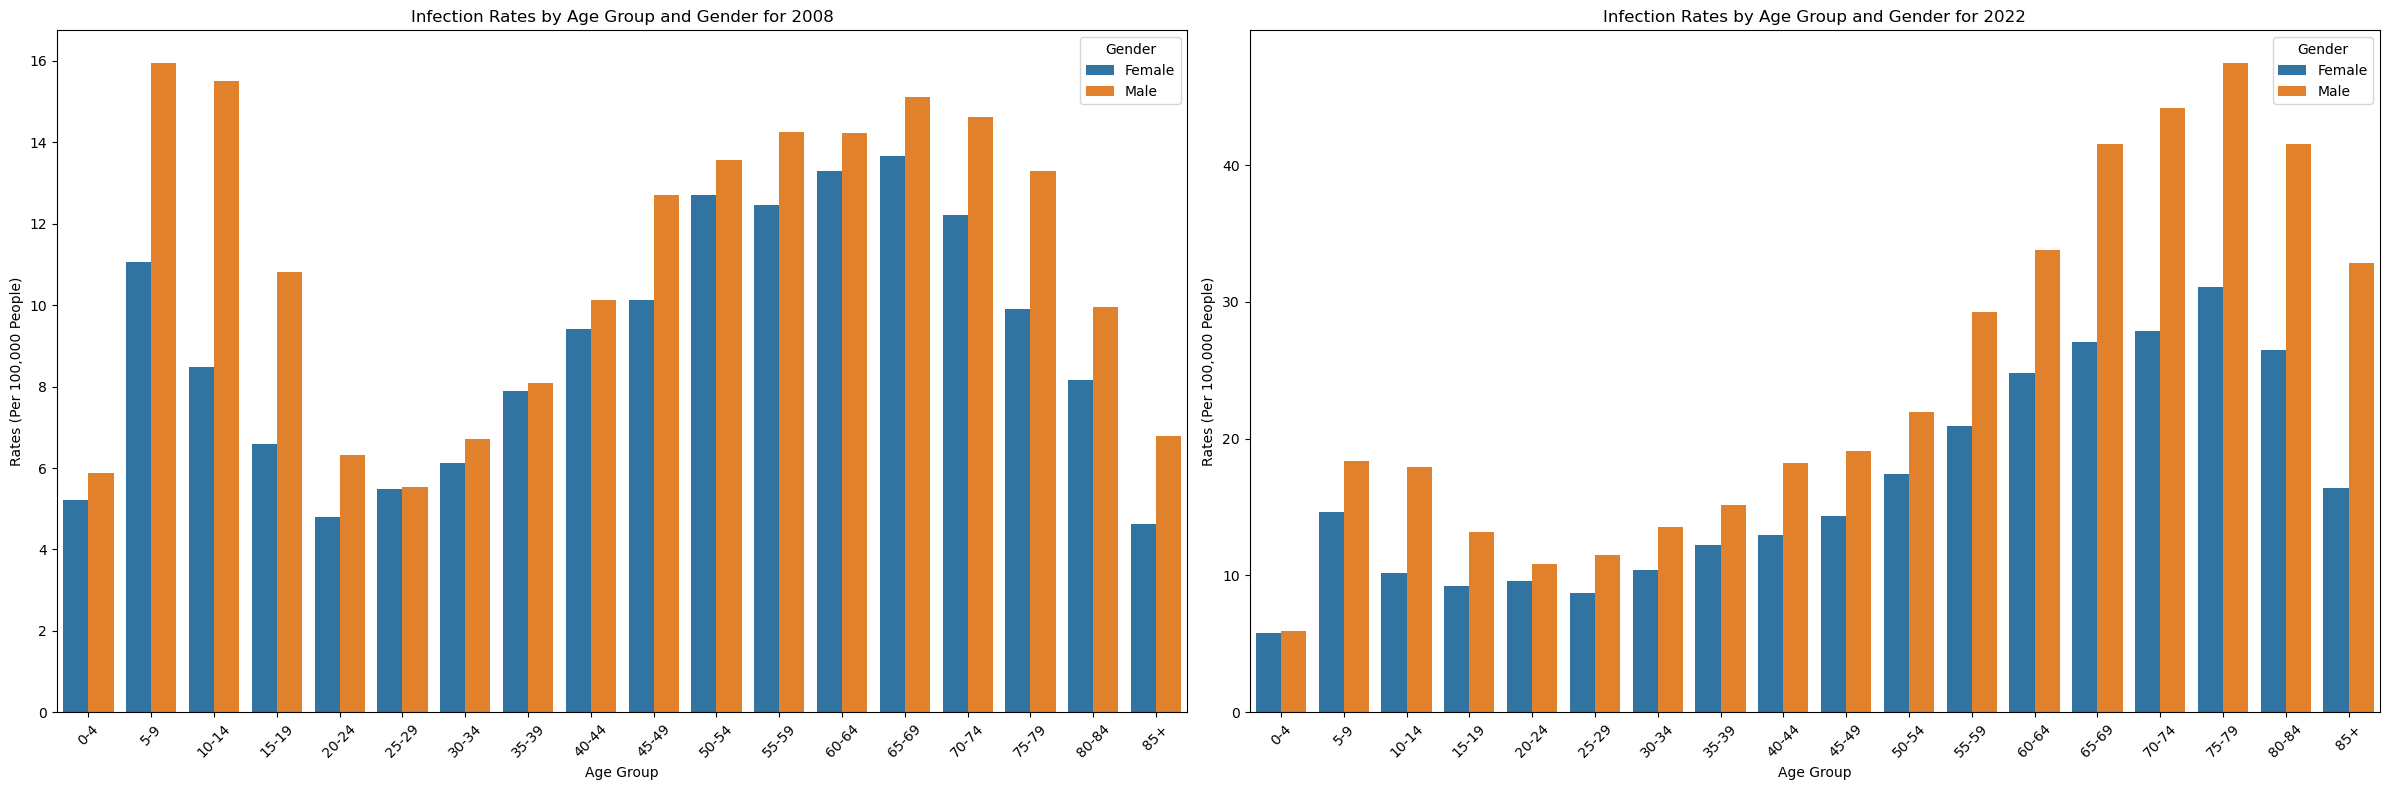

In [366]:
data_2008 = age_gender[age_gender['Year'] == 2008]
data_2022 = age_gender[age_gender['Year'] == 2022]
fig, ax = plt.subplots(1, 2, figsize=(24, 8)) 

#2008 data
sns.barplot(data=data_2008, x='Age Group', y='Rates', hue='Sex', ax=ax[0])
ax[0].set_title('Infection Rates by Age Group and Gender for 2008')
ax[0].set_xlabel('Age Group')
ax[0].set_ylabel('Rates (Per 100,000 People)')
ax[0].tick_params(axis='x', rotation=45)
ax[0].legend(title='Gender')

#2022 data
sns.barplot(data=data_2022, x='Age Group', y='Rates', hue='Sex', ax=ax[1])
ax[1].set_title('Infection Rates by Age Group and Gender for 2022')
ax[1].set_xlabel('Age Group')
ax[1].set_ylabel('Rates (Per 100,000 People)')
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend(title='Gender')
plt.tight_layout()
plt.show()

# Hepatitis C Disease Visualization

In [479]:
st_death_rate = pd.read_csv("Desktop/finals/analyzedHepC/state_death_rate.csv")
st_deaths = pd.read_csv("Desktop/finals/analyzedHepC/state_deaths.csv")

/var/folders/50/kclhm2493yldwb75yt_k454r0000gn/T/ipykernel_65088/3809528706.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  st_deaths = pd.read_csv("Desktop/finals/analyzedHepC/state_deaths.csv")


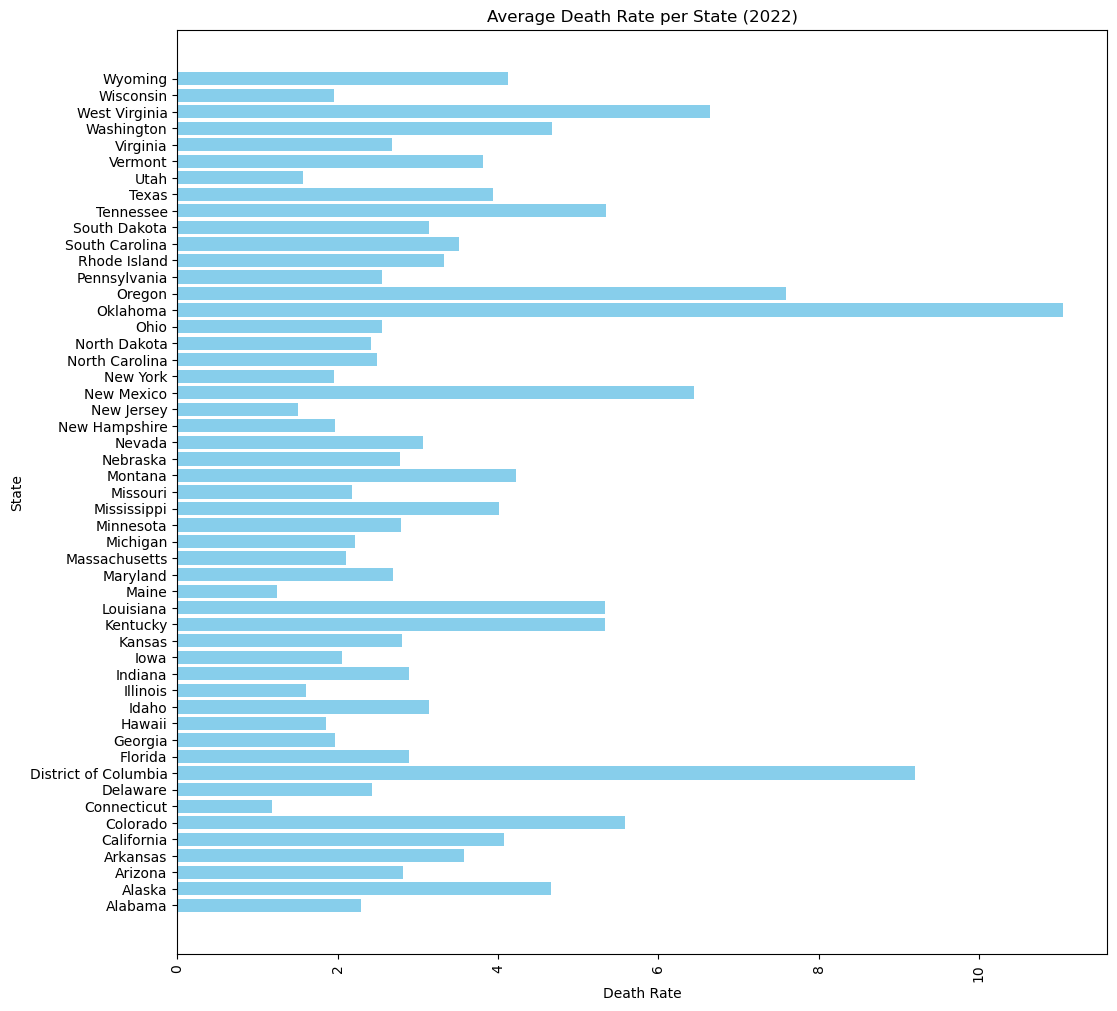

In [481]:
st_death_rate = st_death_rate.drop('Average_Death_Rate', axis=1)
plt.figure(figsize=(12, 12))
plt.barh(st_death_rate['State'], st_death_rate['Actual_Death_Rate'], color='skyblue')
plt.xlabel('Death Rate')
plt.ylabel('State')
plt.title('Average Death Rate per State (2022)')
plt.xticks(rotation=90) 
plt.show()

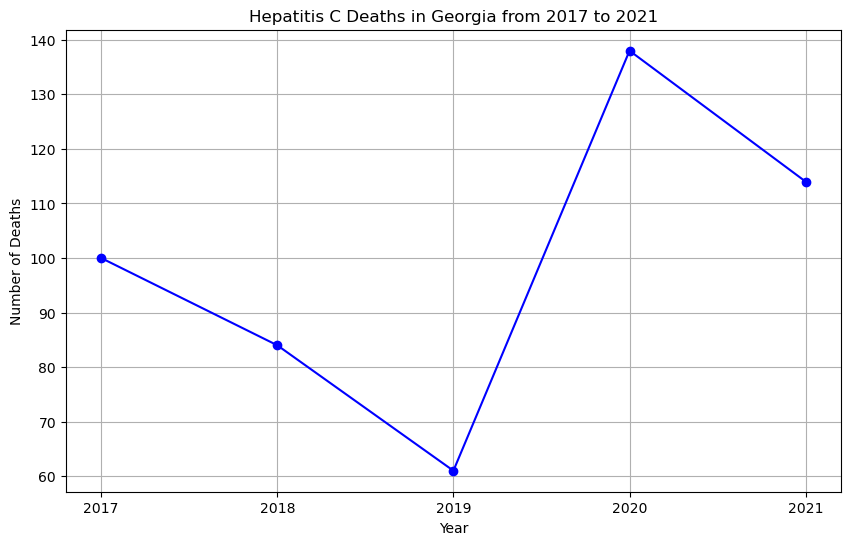

In [487]:
georgia_data = st_deaths[st_deaths['State'] == 'Georgia']

# Prepare the data for plotting
years = ['2017', '2018', '2019', '2020', '2021']
numbers = [georgia_data[f"{year}_Number"].values[0] for year in years]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(years, numbers, marker='o', linestyle='-', color='b')
plt.title('Hepatitis C Deaths in Georgia from 2017 to 2021')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()

# RSV Visualization

In [489]:
data = pd.read_csv("Desktop/finals/analyzed_RSV.csv")

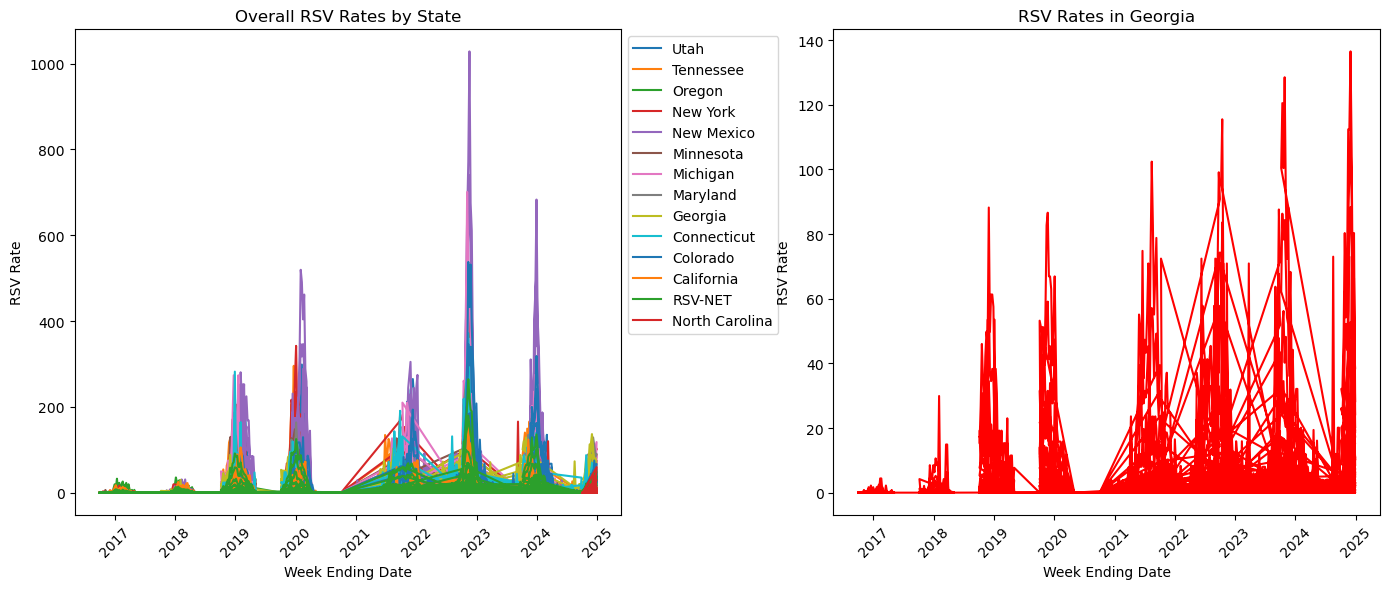

In [491]:
data['Week ending date'] = pd.to_datetime(data['Week ending date'])
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
for state in data['State'].unique():
    state_data = data[data['State'] == state]
    plt.plot(state_data['Week ending date'], state_data['Rate'], label=state)
plt.title('Overall RSV Rates by State')
plt.xlabel('Week Ending Date')
plt.ylabel('RSV Rate')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
georgia_data = data[data['State'] == 'Georgia']
plt.plot(georgia_data['Week ending date'], georgia_data['Rate'], label='Georgia', color='red')
plt.title('RSV Rates in Georgia')
plt.xlabel('Week Ending Date')
plt.ylabel('RSV Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# LaCrose Disease Visualizations

In [500]:
neuro = pd.read_csv("Desktop/finals/analyzedLacrose/County_neuroinvasive2003-2023!!.csv")

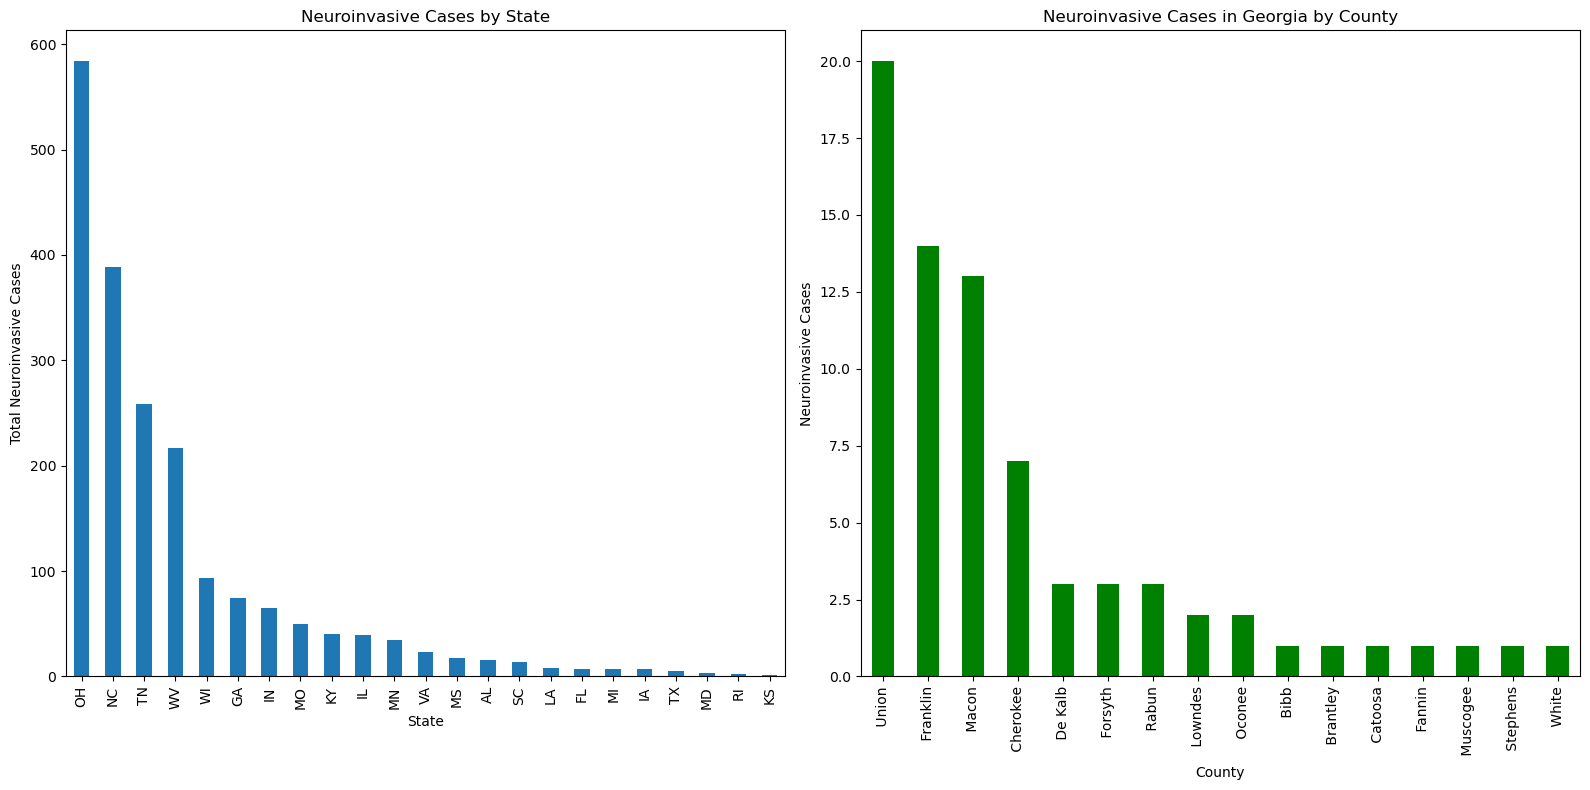

In [502]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
neuro.groupby('State')['Neuroinvasive_cases'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Neuroinvasive Cases by State')
plt.xlabel('State')
plt.ylabel('Total Neuroinvasive Cases')
plt.subplot(1, 2, 2)
georgia_data = neuro[neuro['State'] == 'GA']
georgia_data.groupby('County')['Neuroinvasive_cases'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Neuroinvasive Cases in Georgia by County')
plt.xlabel('County')
plt.ylabel('Neuroinvasive Cases')
plt.tight_layout()
plt.show()